In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Classroom/Machine Leaming/BankNote_Authentication.csv'

In [ ]:
df = pd.read_csv(file_path)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
X = df.drop("class", axis=1)
y = df["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',solver='adam',
                    max_iter=500,early_stopping=True,validation_fraction=0.1, random_state=42)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[147   1]
 [ 26 101]]
TN=147, FP=1, FN=26, TP=101
Accuracy: 0.9018
Precision: 0.9902
Recall: 0.7953
F1 Score: 0.8821


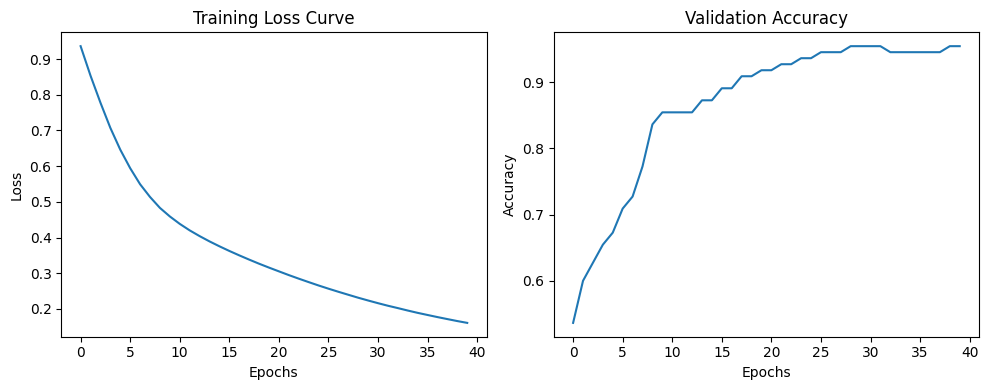

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

if hasattr(mlp, 'validation_scores_'):
 plt.subplot(1, 2, 2)
plt.plot(mlp.validation_scores_)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()